
### **Clasificacion de ropa (Fashion_MNIST)**




In [1]:
#Librerías
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#The stars
import tensorflow as tf
from tensorflow import keras

In [7]:
#importacion dataset
fashion_mnist = keras.datasets.fashion_mnist
#divido el dataset
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

### **Divido el dataset en entrenamiento, test y validación. Aprovechamos y normalizamos los pixeles**

In [8]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

(60000, 28, 28)


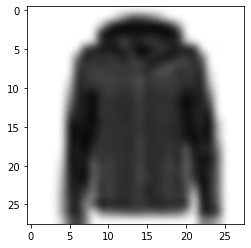

In [9]:
print(X_train_full.shape)

plt.imshow(X_train[0], cmap='binary', interpolation='bicubic')

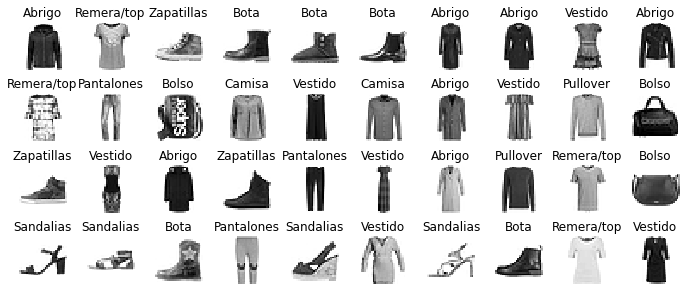

In [10]:
class_names = ["Remera/top", "Pantalones", "Pullover", "Vestido", "Abrigo",
               "Sandalias", "Camisa", "Zapatillas", "Bolso", "Bota"]

n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

### **Creamos un modelo secuencial con keras**

In [11]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [12]:
model = keras.models.Sequential()
#Agrego layers
model.add(keras.layers.Flatten(input_shape=[28, 28])) 
model.add(keras.layers.Dense(300, activation="relu")) 
model.add(keras.layers.Dense(100, activation="relu")) 
model.add(keras.layers.Dense(10, activation="softmax")) 

### **Compilación y visualización**

In [14]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


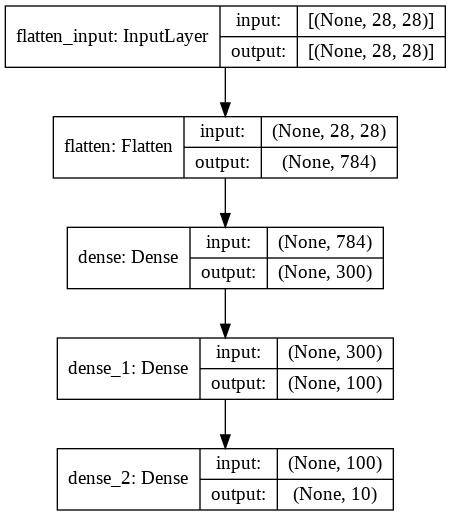

In [16]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

### **Entrenamiento del modelo**

In [17]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
1719/1719 [==============================] - 5s 3ms/step - loss: 1.0187 - accuracy: 0.6805 - val_loss: 0.5213 - val_accuracy: 0.8226
Epoch 2/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5028 - accuracy: 0.8262 - val_loss: 0.4349 - val_accuracy: 0.8528
Epoch 3/20
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4483 - accuracy: 0.8424 - val_loss: 0.5331 - val_accuracy: 0.7986
Epoch 4/20
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4208 - accuracy: 0.8528 - val_loss: 0.3916 - val_accuracy: 0.8654
Epoch 5/20
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4058 - accuracy: 0.8587 - val_loss: 0.3740 - val_accuracy: 0.8698
Epoch 6/20
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3752 - accuracy: 0.8676 - val_loss: 0.3708 - val_accuracy: 0.8724
Epoch 7/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3652 - accuracy: 0.8708 - val_loss: 0.3618 - val_accuracy:

In [18]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

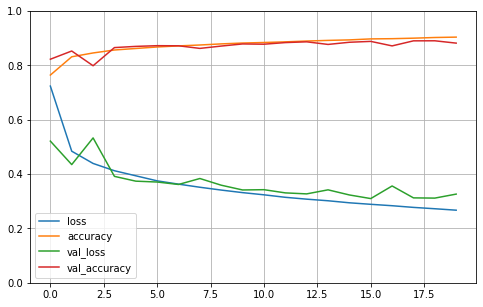

In [19]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### **Evaluación y predicción**

In [20]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3616 - accuracy: 0.8676


[0.3616035580635071, 0.8676000237464905]

In [24]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.  , 0.08, 0.  , 0.88],
       [0.  , 0.  , 0.96, 0.  , 0.04, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [25]:
y_pred = model.predict_classes(X_new)
y_pred

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([9, 2, 1])

In [26]:
y_pred = np.argmax(y_proba, axis=1)
y_pred

array([9, 2, 1])

In [27]:
np.array(class_names)[y_pred]

array(['Bota', 'Pullover', 'Pantalones'], dtype='<U10')

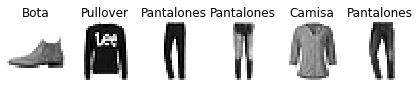

In [35]:
X_new1 = X_test[:6]
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new1):
    plt.subplot(1, 6, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()